#### Imports

In [ ]:
# Libs Básicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Libs Sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

#Import the DecisionTree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import mean_squared_error as mse

#### Functions

#### Data

In [ ]:
# importando os dados para o Jupyter Notebook
df = pd.read_csv("/content/df_sem_out.csv")

In [ ]:
df.head()

,Unnamed: 0,BEDROOMS,BATHROOMS,GARAGE,NEAREST_SCH_DIST,BUILD_YEAR,PRICE
0,0,4,2,2.0,0.828339,2003.0,565000
1,1,3,2,2.0,5.524324,2013.0,365000
2,2,3,1,1.0,1.649178,1979.0,287000
3,3,2,1,2.0,1.571401,1953.0,255000
4,4,4,1,2.0,1.514922,1998.0,325000


In [ ]:
# Achando o X_data e o y_label
#X_data = df[["BEDROOMS", "BATHROOMS", "GARAGE", "LAND_AREA", "FLOOR_AREA"]].to_numpy()
X_data = df[["BEDROOMS", "BATHROOMS", "GARAGE","NEAREST_SCH_DIST", "BUILD_YEAR"]].to_numpy()

In [ ]:
X_data

array([[4.00000000e+00, 2.00000000e+00, 2.00000000e+00, 8.28338552e-01,
        2.00300000e+03],
       [3.00000000e+00, 2.00000000e+00, 2.00000000e+00, 5.52432435e+00,
        2.01300000e+03],
       [3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.64917818e+00,
        1.97900000e+03],
       ...,
       [4.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.60745459e+00,
        1.99600000e+03],
       [3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.03939822e-01,
        2.00900000e+03],
       [5.00000000e+00, 2.00000000e+00, 5.00000000e+00, 4.08790698e-01,
        1.98600000e+03]])

In [ ]:
X_data[0]

array([4.00000000e+00, 2.00000000e+00, 2.00000000e+00, 8.28338552e-01,
       2.00300000e+03])

In [ ]:
y_label = df["PRICE"].to_numpy()

In [ ]:
y_label

array([565000, 365000, 287000, ..., 369000, 357000, 600000])

In [ ]:
# Shape de X_data e y_label -> Os dados totais
X_data.shape, y_label.shape

((13798, 5), (13798,))

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split( X_data, y_label, train_size = 0.8)
x_train, x_test, y_train, y_test = train_test_split( X_data, y_label, train_size = 0.8)

In [ ]:
print(x_train.shape, y_train.shape)

(11038, 5) (11038,)


In [ ]:
print(x_test.shape, y_test.shape)

(2760, 5) (2760,)


#### ML SVR Regression

In [ ]:
#Criando o modelo
model_svr = SVR(kernel = "linear", degree = 4, C = 3.0)

In [ ]:
# Treinar o modelo -> x_train, y_train
model_svr.fit(x_train, y_train)

SVR(C=3.0, degree=4, kernel='linear')

##### Testes e Qualidade - Acurácia

In [ ]:
preditos = model_svr.predict(x_test)
print(preditos)

[498523.28438675 510096.88151347 490921.55834755 ... 484039.18241884
 554004.06461062 525873.92402438]


In [ ]:
score_mse = mse(y_test, preditos)
print(score_mse)

36000558109.4421


In [ ]:
# Medir o valor de RMSE
RMSE = np.sqrt(score_mse)
print(RMSE)

189738.13035191977


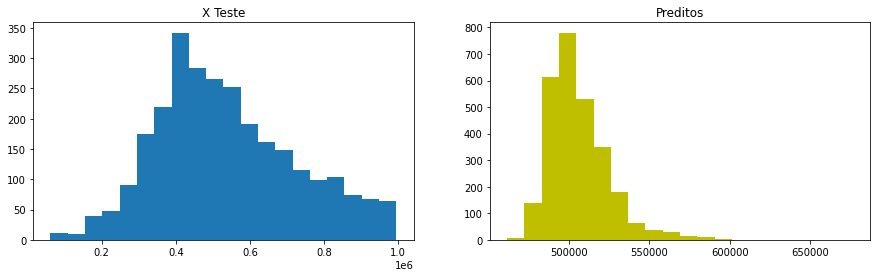

In [ ]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title("X Teste")
plt.hist(y_test, bins = 20)
plt.subplot(1,2,2)
plt.hist(preditos, bins = 20, color = "y")
plt.title("Preditos")
plt.show()

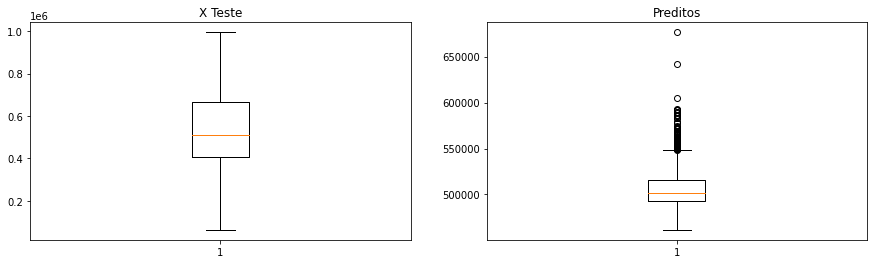

In [ ]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title("X Teste")
plt.boxplot(y_test)
plt.subplot(1,2,2)
plt.boxplot(preditos)
plt.title("Preditos")
plt.show()

### DecisionTree

In [ ]:
#Criando o modelo
model_tree = DecisionTreeRegressor(criterion='absolute_error')

In [ ]:
#Treinado o modelo
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [ ]:
# Calcular os preditos pelo model_tree
predictTree = model_tree.predict(x_test)
print(predictTree)
print(predictTree.shape)

[620000. 550000. 665000. ... 285000. 680000. 370000.]
(2760,)


In [ ]:
# Medir o RSME
scoreTree = mse(y_test, predictTree)
RSME_Tree = np.sqrt(scoreTree)
print("O valor do RSME do modelo Decision Tree é: {:.2f}".format(RSME_Tree))

O valor do RSME do modelo Decision Tree é: 228136.82


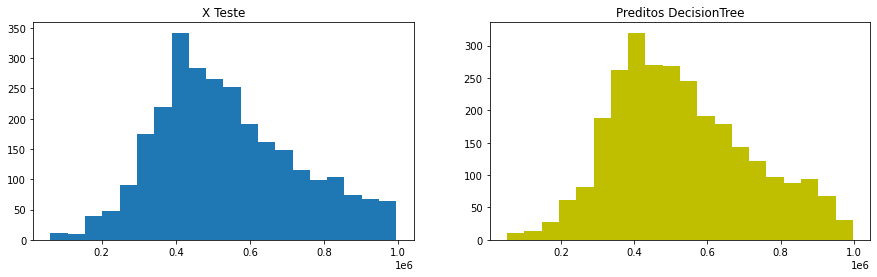

In [ ]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title("X Teste")
plt.hist(y_test, bins = 20)
plt.subplot(1,2,2)
plt.hist(predictTree, bins = 20, color = "y")
plt.title("Preditos DecisionTree")
plt.show()

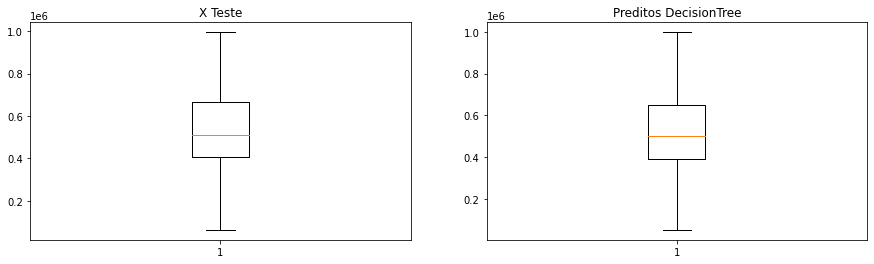

In [ ]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title("X Teste")
plt.boxplot(y_test)
plt.subplot(1,2,2)
plt.boxplot(predictTree)
plt.title("Preditos DecisionTree")
plt.show()

#### Avaliando e Prevendo com o modelo

In [ ]:
df.head(2)

,Unnamed: 0,BEDROOMS,BATHROOMS,GARAGE,NEAREST_SCH_DIST,BUILD_YEAR,PRICE
0,0,4,2,2.0,0.828339,2003.0,565000
1,1,3,2,2.0,5.524324,2013.0,365000


In [ ]:
df.NEAREST_SCH_DIST.min()

0.0709120036079524

In [ ]:
df.NEAREST_SCH_DIST.max()

19.40623300306224

In [ ]:
df.BUILD_YEAR.min(), df.BUILD_YEAR.max()

(1886.0, 2017.0)

In [ ]:
# Prevendo com os dados que a gente está criando

dado = np.array([[10.0, 5.0, 2.0, 3.0, 2010.0]])
print("O valor da casa predito é: {:.2f}".format(model_tree.predict(dado)[0]))

O valor da casa predito é: 600000.00
